In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

<IPython.core.display.Javascript object>

This tutorial is from a [Toward's Data Science Article](https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976). The dataset can be ontained from [this link.](https://github.com/suvoooo/Machine_Learning/blob/master/winequality-red.csv)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

### Importing dataset 

In [4]:
wine = pd.read_csv("wine_quality.csv", sep=";")

<IPython.core.display.Javascript object>

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<IPython.core.display.Javascript object>

In [6]:
print(wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<IPython.core.display.Javascript object>

### Visual exploration 

In [7]:
print(wine["quality"].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


<IPython.core.display.Javascript object>

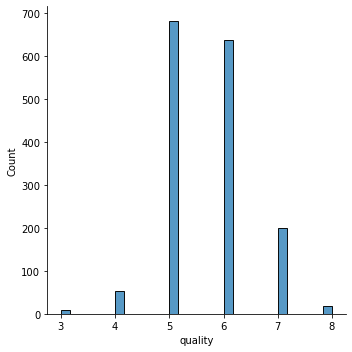

<IPython.core.display.Javascript object>

In [8]:
sns.displot(wine["quality"])
plt.show()

Most of the wines have a quality of 5 or 6.

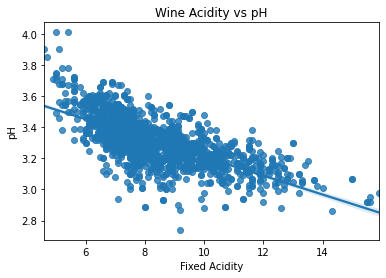

<IPython.core.display.Javascript object>

In [9]:
sns.regplot(wine["fixed acidity"], wine["pH"])
plt.xlabel("Fixed Acidity")
plt.ylabel("pH")
plt.title("Wine Acidity vs pH")
plt.show()

Acidity and pH have a high negative correlation.

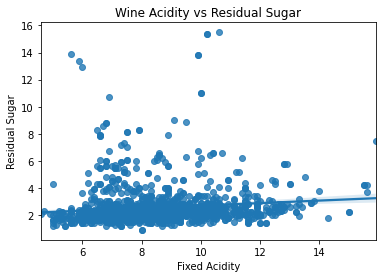

<IPython.core.display.Javascript object>

In [10]:
sns.regplot(wine["fixed acidity"], wine["residual sugar"])
plt.xlabel("Fixed Acidity")
plt.ylabel("Residual Sugar")
plt.title("Wine Acidity vs Residual Sugar")
plt.show()

Pipeline class allows sticking multiple processes into a single scikit-learn estimator. pipeline class has fit, predict and score method just like any other estimator

### Selecting features and labels 

In [11]:
X = wine.drop(["quality"], axis=1)
y = wine["quality"]

<IPython.core.display.Javascript object>

### Standard Scaling and fitting pipeline 

In [12]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

<IPython.core.display.Javascript object>

Since the features of the dataset vary over a wide range, Standard Scaling is performed. This subtracts the mean from each feature and then scales it to unit variance.

Pipeline is created by providing a list of steps. Steps are a list of tuples consisting of name and instance of transformer or estimator.

In [13]:
steps = [("scaler", StandardScaler()), ("SVM", SVC())]
pipeline = Pipeline(steps)

<IPython.core.display.Javascript object>

### Dividing the dataset 

In [14]:
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

<IPython.core.display.Javascript object>

Stratify is used as labels are unbalanced as most of the wine quality falls in the 5 or 6 range.

###  Applying GridSeach CV to the pipeline

SVM has 2 parameters C and gamma that are entered into a parameters dictionary and then used as a parameter for the gridsearchcv object.

In [16]:
parameters = {"SVM__C": [0.001, 0.1, 10, 100], "SVM__gamma": [0.1, 0.01]}

<IPython.core.display.Javascript object>

In [17]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

<IPython.core.display.Javascript object>

In [18]:
grid.fit(X_train, y_train)
print("The Grid Search CV score is {:.2f}.".format(grid.score(X_test, y_test)))

The Grid Search CV score is 0.61.


<IPython.core.display.Javascript object>

In [19]:
print("The best parameters are {}".format(grid.best_params_))

The best parameters are {'SVM__C': 10, 'SVM__gamma': 0.1}


<IPython.core.display.Javascript object>